<a href="https://colab.research.google.com/github/Estheredijala/-python-for-Machine-Learning-/blob/main/Credit_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import os

In [ ]:
credit = pd.read_csv("credit_train 1.csv")
credit.head(2)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0


EXPLORATORY DATA ANALYSIS EDA

In [ ]:
#Checking for the count of duplicate value
credit.duplicated().sum()

10728

In [ ]:
#removing duplicate rows for the dataframe and also checking for the new dimension of the data frame after droopping the duplicate
credit.drop_duplicates(inplace = True)
credit.shape

(89786, 19)

In [ ]:
#generate descriptive statistics of the dataframe
credit.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,8.978500e+04,70631.000000,7.063100e+04,89785.000000,89785.000000,41448.000000,89785.000000,89785.000000,8.978500e+04,8.978300e+04,89595.000000,89776.000000
mean,1.306089e+07,1130.830598,1.375894e+06,18396.906410,18.248642,34.975873,11.123250,0.164983,2.940351e+05,7.756565e+05,0.115531,0.028605
std,3.329556e+07,1571.037395,1.104852e+06,12145.282372,7.034607,22.008585,4.998884,0.478010,3.722277e+05,8.803517e+06,0.347919,0.255108
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.802680e+05,708.000000,8.479320e+05,10157.400000,13.500000,16.000000,8.000000,0.000000,1.129360e+05,2.770680e+05,0.000000,0.000000
50%,3.138740e+05,729.000000,1.168975e+06,16140.310000,17.000000,32.000000,10.000000,0.000000,2.097220e+05,4.726920e+05,0.000000,0.000000
75%,5.323780e+05,742.000000,1.648915e+06,23918.910000,21.700000,51.000000,14.000000,0.000000,3.675170e+05,7.914500e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.655574e+08,435843.280000,70.500000,176.000000,76.000000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


In [ ]:
credit.isnull().sum()

Loan ID                             1
Customer ID                         1
Loan Status                         1
Current Loan Amount                 1
Term                                1
Credit Score                    19155
Annual Income                   19155
Years in current job             3803
Home Ownership                      1
Purpose                             1
Monthly Debt                        1
Years of Credit History             1
Months since last delinquent    48338
Number of Open Accounts             1
Number of Credit Problems           1
Current Credit Balance              1
Maximum Open Credit                 3
Bankruptcies                      191
Tax Liens                          10
dtype: int64

In [ ]:
#checking the count of null values
credit.isna().sum()

Loan ID                             1
Customer ID                         1
Loan Status                         1
Current Loan Amount                 1
Term                                1
Credit Score                    19155
Annual Income                   19155
Years in current job             3803
Home Ownership                      1
Purpose                             1
Monthly Debt                        1
Years of Credit History             1
Months since last delinquent    48338
Number of Open Accounts             1
Number of Credit Problems           1
Current Credit Balance              1
Maximum Open Credit                 3
Bankruptcies                      191
Tax Liens                          10
dtype: int64

In [ ]:
#observation of all the columns
credit.columns

Index(['Loan ID', 'Customer ID', 'Loan Status', 'Current Loan Amount', 'Term',
       'Credit Score', 'Annual Income', 'Years in current job',
       'Home Ownership', 'Purpose', 'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

In [ ]:
#checking for unique occurrences
credit.value_counts

<bound method DataFrame.value_counts of                                      Loan ID  \
0       14dd8831-6af5-400b-83ec-68e61888a048   
1       4771cc26-131a-45db-b5aa-537ea4ba5342   
2       4eed4e6a-aa2f-4c91-8651-ce984ee8fb26   
3       77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a   
4       d4062e70-befa-4995-8643-a0de73938182   
...                                      ...   
99996   06eba04f-58fc-424a-b666-ed72aa008900   
99997   e1cb4050-eff5-4bdb-a1b0-aabd3f7eaac7   
99998   81ab928b-d1a5-4523-9a3c-271ebb01b4fb   
99999   c63916c6-6d46-47a9-949a-51d09af4414f   
100000                                   NaN   

                                 Customer ID Loan Status  Current Loan Amount  \
0       981165ec-3274-42f5-a3b4-d104041a9ca9  Fully Paid             445412.0   
1       2de017a3-2e01-49cb-a581-08169e83be29  Fully Paid             262328.0   
2       5efb2b2b-bf11-4dfd-a572-3761a2694725  Fully Paid           99999999.0   
3       e777faab-98ae-45af-9a86-7ce5b33b1011  Fully Paid   

In [ ]:
#rechecking for the shape
credit.shape

(89786, 19)

In [ ]:
#summary of all the columns

def check (df):
    l=[]
    columns=df.columns
    for col in columns:
        dtypes=df[col].dtypes
        nunique= df[col].nunique()
        sum_null=df[col].isnull().sum()
        l.append([col,dtypes,nunique,sum_null])
    df_check=pd.DataFrame(l)
    df_check.columns=["column", "dtypes", "nunique","sum_null"]
    return df_check
check(credit)

,column,dtypes,nunique,sum_null
0,Loan ID,object,81999,1
1,Customer ID,object,81999,1
2,Loan Status,object,2,1
3,Current Loan Amount,float64,22004,1
4,Term,object,2,1
5,Credit Score,float64,324,19155
6,Annual Income,float64,36174,19155
7,Years in current job,object,11,3803
8,Home Ownership,object,4,1
9,Purpose,object,16,1


In [ ]:
#understanding the structure and content of the datframe
credit.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89786 entries, 0 to 100000
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan ID                       89785 non-null  object 
 1   Customer ID                   89785 non-null  object 
 2   Loan Status                   89785 non-null  object 
 3   Current Loan Amount           89785 non-null  float64
 4   Term                          89785 non-null  object 
 5   Credit Score                  70631 non-null  float64
 6   Annual Income                 70631 non-null  float64
 7   Years in current job          85983 non-null  object 
 8   Home Ownership                89785 non-null  object 
 9   Purpose                       89785 non-null  object 
 10  Monthly Debt                  89785 non-null  float64
 11  Years of Credit History       89785 non-null  float64
 12  Months since last delinquent  41448 non-null  float64
 13  Numbe

In [ ]:
#count of all unique values in the dataframe
credit.nunique()

Loan ID                         81999
Customer ID                     81999
Loan Status                         2
Current Loan Amount             22004
Term                                2
Credit Score                      324
Annual Income                   36174
Years in current job               11
Home Ownership                      4
Purpose                            16
Monthly Debt                    65765
Years of Credit History           506
Months since last delinquent      116
Number of Open Accounts            51
Number of Credit Problems          14
Current Credit Balance          32730
Maximum Open Credit             44596
Bankruptcies                        8
Tax Liens                          12
dtype: int64

In [ ]:
credit.head(2)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0


In [ ]:
#dropping 2 columns "Loan ID", "Customer ID" because they both have unique data
columns_to_drop = ["Loan ID", "Customer ID"]
existing_columns = credit.columns.intersection(columns_to_drop)
credit.drop(existing_columns,axis =1, inplace = True)

In [ ]:
credit.drop_duplicates(inplace = True)
credit

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99996,Fully Paid,99999999.0,Short Term,732.0,1289416.0,1 year,Rent,Debt Consolidation,13109.05,9.4,21.0,22.0,0.0,153045.0,509234.0,0.0,0.0
99997,Fully Paid,103136.0,Short Term,742.0,1150545.0,6 years,Rent,Debt Consolidation,7315.57,18.8,18.0,12.0,1.0,109554.0,537548.0,1.0,0.0
99998,Fully Paid,530332.0,Short Term,746.0,1717524.0,9 years,Rent,Debt Consolidation,9890.07,15.0,NaN,8.0,0.0,404225.0,738254.0,0.0,0.0
99999,Fully Paid,99999999.0,Short Term,743.0,935180.0,NaN,Own Home,Debt Consolidation,9118.10,13.0,NaN,4.0,1.0,45600.0,91014.0,1.0,0.0


In [ ]:
credit.head(2)

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0


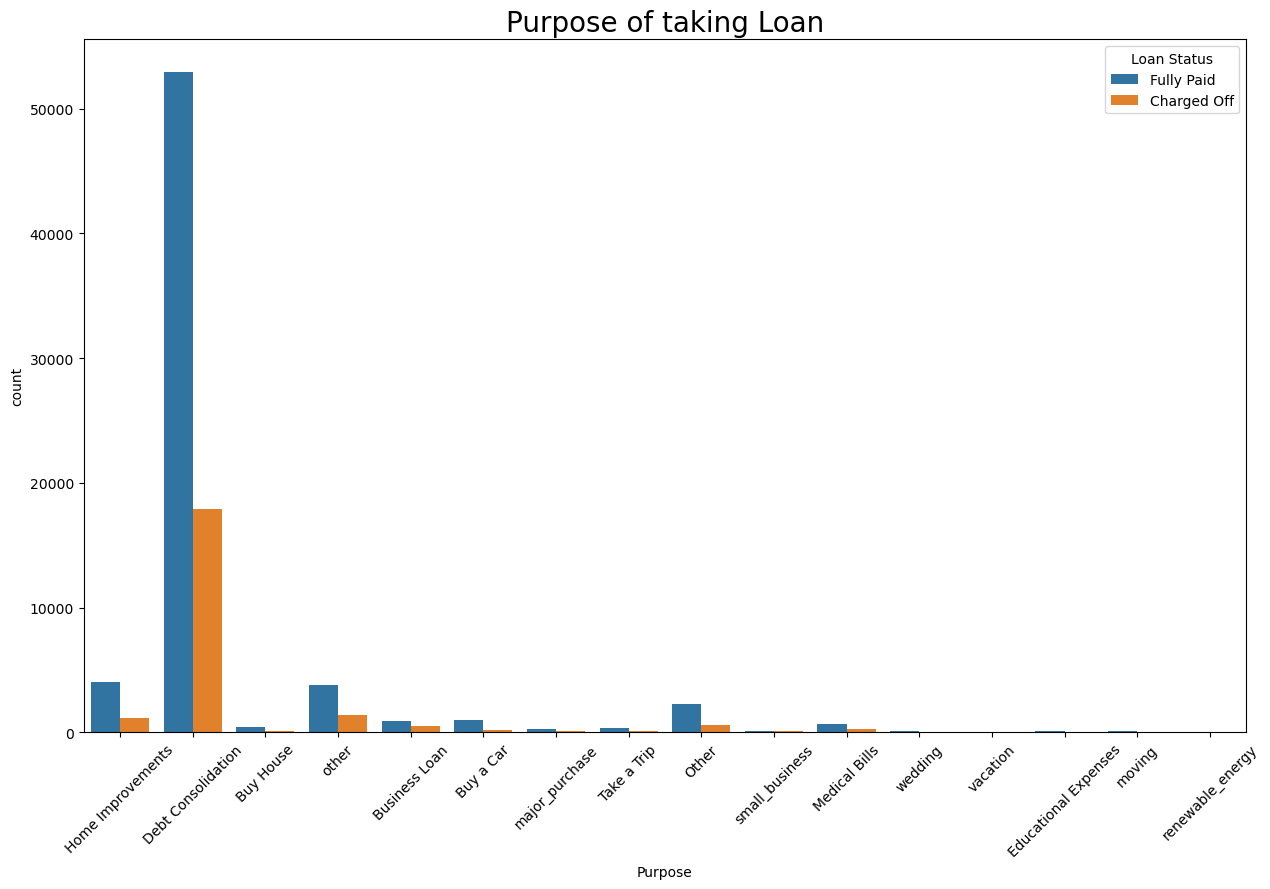

In [ ]:
#The diagram below show the purpose of loan taking, Majority of the loan was taken for Debt consolidation purpose
plt.figure(figsize =(15,9))
sns.countplot(x = "Purpose", data = credit, hue = "Loan Status")
plt.xticks(rotation = 45)
plt.title("Purpose of taking Loan", fontdict= {"fontsize": 20})
plt.show()

<Axes: xlabel='Loan Status', ylabel='count'>

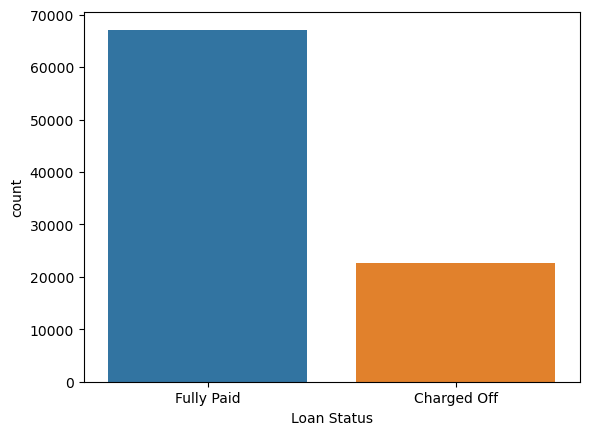

In [ ]:
#The images shows the loan status of the loan taken
sns.countplot(x = "Loan Status", data = credit)

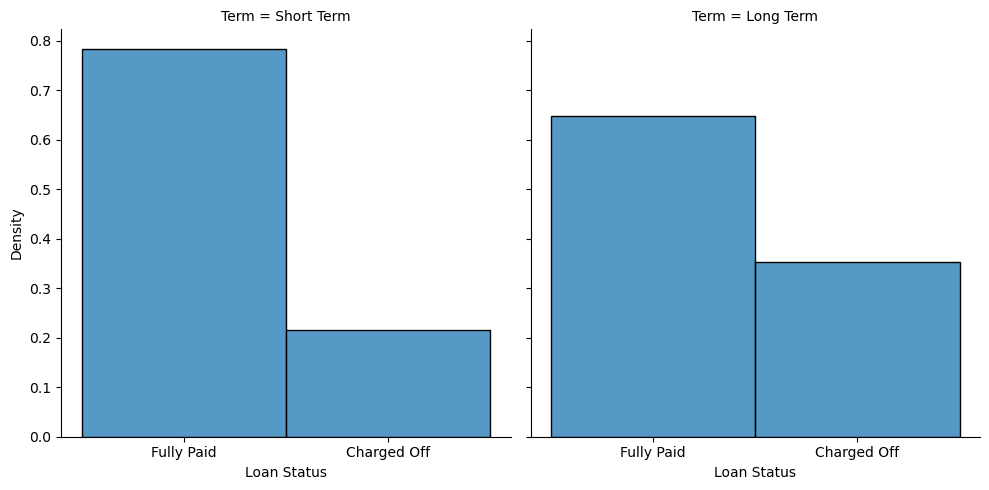

In [ ]:
#Comparison between the loan status (Long and short term loans)
sns.displot(credit, x = "Loan Status", col = "Term",stat= "density", common_norm= False)

In [ ]:
credit.head(2)

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0


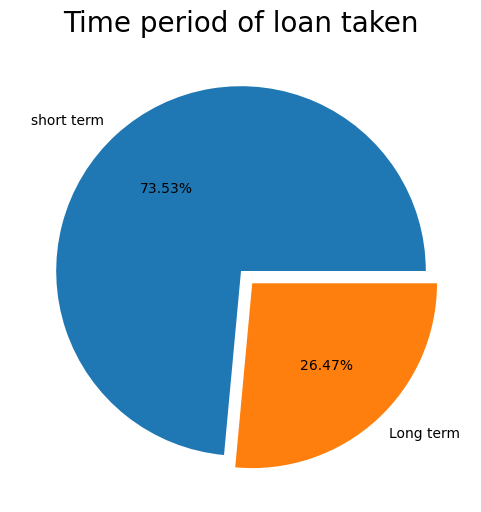

In [ ]:
plt.figure(figsize = (6,6))
plt.pie(x = credit["Term"].value_counts(),labels = ["short term", "Long term"], autopct = "%.2f%%", explode= [0,0.09])
plt.title("Time period of loan taken", fontdict = {"fontsize":20})
plt.show()

In [ ]:
#Annual income by loan term
annual_income= credit.groupby("Term").agg({"Annual Income": "sum"})
annual_income

,Annual Income
Term,
Long Term,3.524992e+10
Short Term,7.617822e+10


In [ ]:
np.int64(annual_income)

array([[35249924306],
       [76178222451]])

In [ ]:
credit["Credit Score"].describe()

count    70631.000000
mean      1130.830598
std       1571.037395
min        585.000000
25%        708.000000
50%        729.000000
75%        742.000000
max       7510.000000
Name: Credit Score, dtype: float64

Annual income

In [ ]:
credit["Annual Income"].describe()

count    7.063100e+04
mean     1.375894e+06
std      1.104852e+06
min      7.662700e+04
25%      8.479320e+05
50%      1.168975e+06
75%      1.648915e+06
max      1.655574e+08
Name: Annual Income, dtype: float64

In [ ]:
credit["Annual Income"].median()

1168975.0

In [ ]:
credit["Annual Income"].mean()

1375894.3876909572

In [ ]:
credit["Annual Income"].fillna(credit["Annual Income"].mean(), inplace = True)

In [ ]:
credit["Annual Income"].isna().sum()

0

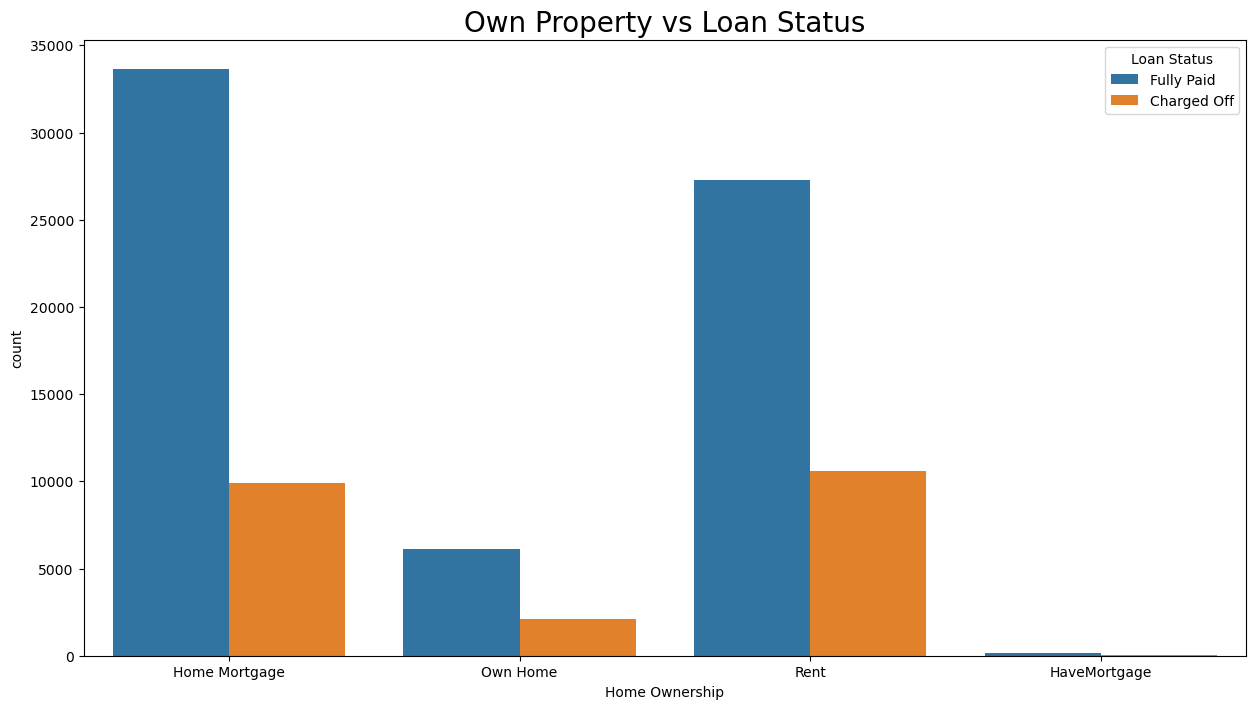

In [ ]:
plt.figure(figsize = (15, 8))
sns.countplot(x = "Home Ownership", data = credit, hue ="Loan Status")
plt.title("Own Property vs Loan Status", fontdict = {"fontsize":20})
plt.show()

In [ ]:
credit.head(2)

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,Fully Paid,445412.0,Short Term,709.0,1.167493e+06,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,Fully Paid,262328.0,Short Term,NaN,1.375894e+06,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
